In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Object Creation (객체 생성)

In [2]:
#Pandas는 리스트를 가지고 Series를 만들고,
#정수로 만들어진 인덱스를 기본값으로 불러온다.
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
#datetime 인덱스와 레이블이 있는 열을 가지고 있는
#numpy 배열을 전달하여 데이터프레임을 만든다.
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4),
                 index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.301242,-0.960926,-0.129875,-0.728123
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133
2013-01-04,0.001127,0.841016,1.466820,-0.510424
2013-01-05,1.324575,1.471176,-0.482346,-1.281677
2013-01-06,-0.285595,-0.164507,0.216564,-0.661587


In [5]:
#Series와 같은 것으로 변환될 수 있는
#객체들의 dict로 구성된 데이터프레임을 만든다.
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
#데이터프레임 결과물의 열은 다양한 데이터타입()dtype으로 구성된다.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

2.Viewing Data (데이터 확인하기)

In [7]:
#데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때
#사용하는 방법
df.tail(3) #끝에서 마지막 3줄 불러옴
df.tail() #끝에서 마지막 5줄 불러옴
df.head() #처음부터 5줄 불러옴

,A,B,C,D
2013-01-01,-1.301242,-0.960926,-0.129875,-0.728123
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133
2013-01-04,0.001127,0.841016,1.466820,-0.510424
2013-01-05,1.324575,1.471176,-0.482346,-1.281677


In [8]:
#인덱스 (index), 열 (column), numpy 데이터의 세부 정보 확인
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
df.values

array([[-1.30124182e+00, -9.60926339e-01, -1.29875238e-01,
        -7.28122576e-01],
       [-7.36391250e-01, -4.19642494e-01,  8.66714964e-01,
        -2.48911320e-01],
       [-3.43531794e-01, -2.53569047e-01,  1.51134683e+00,
        -1.50132715e-01],
       [ 1.12701509e-03,  8.41016335e-01,  1.46682000e+00,
        -5.10423796e-01],
       [ 1.32457523e+00,  1.47117647e+00, -4.82346074e-01,
        -1.28167690e+00],
       [-2.85594906e-01, -1.64507225e-01,  2.16564194e-01,
        -6.61586860e-01]])

In [11]:
#describe()는 데이터의 대략적인 통계적 정보 요약 확인
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.223510,0.085591,0.574871,-0.596809
std,0.882025,0.896499,0.836719,0.404598
min,-1.301242,-0.960926,-0.482346,-1.281677
25%,-0.638176,-0.378124,-0.043265,-0.711489
50%,-0.314563,-0.209038,0.541640,-0.586005
75%,-0.070553,0.589635,1.316794,-0.314289
max,1.324575,1.471176,1.511347,-0.150133


In [12]:
#데이터 전치
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.301242,-0.736391,-0.343532,0.001127,1.324575,-0.285595
B,-0.960926,-0.419642,-0.253569,0.841016,1.471176,-0.164507
C,-0.129875,0.866715,1.511347,1.466820,-0.482346,0.216564
D,-0.728123,-0.248911,-0.150133,-0.510424,-1.281677,-0.661587


In [13]:
#축 별로 정렬
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.728123,-0.129875,-0.960926,-1.301242
2013-01-02,-0.248911,0.866715,-0.419642,-0.736391
2013-01-03,-0.150133,1.511347,-0.253569,-0.343532
2013-01-04,-0.510424,1.466820,0.841016,0.001127
2013-01-05,-1.281677,-0.482346,1.471176,1.324575
2013-01-06,-0.661587,0.216564,-0.164507,-0.285595


In [14]:
#값별로 정렬
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-1.301242,-0.960926,-0.129875,-0.728123
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133
2013-01-06,-0.285595,-0.164507,0.216564,-0.661587
2013-01-04,0.001127,0.841016,1.466820,-0.510424
2013-01-05,1.324575,1.471176,-0.482346,-1.281677


3.Selection (선택)

In [15]:
#Getting (데이터 얻기)
#df.A와 동일한 Series를 생성하는 단일 열 선택
df['A']

2013-01-01   -1.301242
2013-01-02   -0.736391
2013-01-03   -0.343532
2013-01-04    0.001127
2013-01-05    1.324575
2013-01-06   -0.285595
Freq: D, Name: A, dtype: float64

In [16]:
#행을 분할하는 []를 통해 선택
df[0:3]

,A,B,C,D
2013-01-01,-1.301242,-0.960926,-0.129875,-0.728123
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133


In [17]:
df['20130102':'20130104']#끝자리 포함

,A,B,C,D
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133
2013-01-04,0.001127,0.841016,1.466820,-0.510424


Selection by Label (Label을 통한 선택)

In [18]:
#라벨을 사용하여 횡단면 출력
df.loc[dates[0]]

A   -1.301242
B   -0.960926
C   -0.129875
D   -0.728123
Name: 2013-01-01 00:00:00, dtype: float64

In [19]:
#라벨을 사용하여 여러 축의 데이터 출력
df.loc[:, ['A','B']]

,A,B
2013-01-01,-1.301242,-0.960926
2013-01-02,-0.736391,-0.419642
2013-01-03,-0.343532,-0.253569
2013-01-04,0.001127,0.841016
2013-01-05,1.324575,1.471176
2013-01-06,-0.285595,-0.164507


In [20]:
#양쪽 종단점을 포함한 라벨 슬라이싱
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.736391,-0.419642
2013-01-03,-0.343532,-0.253569
2013-01-04,0.001127,0.841016


In [21]:
#반환되는 객체의 차원을 줄임
df.loc['20130102',['A','B']]

A   -0.736391
B   -0.419642
Name: 2013-01-02 00:00:00, dtype: float64

In [22]:
#스칼라 값 구하기
df.loc[dates[0],'A']

-1.3012418225856444

In [23]:
#스칼라값 더 빠르게 구하기
df.at[dates[0],'A']

-1.3012418225856444

In [24]:
#Selection by Position (위치로 선택하기)
#넘겨받은 정수의 위치를 기준으로 선택
df.iloc[3]

A    0.001127
B    0.841016
C    1.466820
D   -0.510424
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
df.iloc[3:5,0:2] #행, 열 순서

,A,B
2013-01-04,0.001127,0.841016
2013-01-05,1.324575,1.471176


In [26]:
#정수로 표기된 위치값의 리스트들을 통해
#numpy / python의 스타일과 유사해짐
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.736391,0.866715
2013-01-03,-0.343532,1.511347
2013-01-05,1.324575,-0.482346


In [27]:
#명시적으로 행 나누기
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133


In [28]:
#명시적으로 열 나누기
df.iloc[:,1:3]

,B,C
2013-01-01,-0.960926,-0.129875
2013-01-02,-0.419642,0.866715
2013-01-03,-0.253569,1.511347
2013-01-04,0.841016,1.466820
2013-01-05,1.471176,-0.482346
2013-01-06,-0.164507,0.216564


In [29]:
#명시적으로 특정 값 얻기
df.iloc[1,1]

-0.4196424937286996

In [30]:
#스칼라 값 빠르게 얻기
df.iat[1,1]

-0.4196424937286996

In [31]:
#Boolean Indexing
#데이터를 선택하기 위해 단일 열의 값 사용
df[df.A>0]

,A,B,C,D
2013-01-04,0.001127,0.841016,1.466820,-0.510424
2013-01-05,1.324575,1.471176,-0.482346,-1.281677


In [32]:
#Boolean 조건 충족하는 데이터프레임에서의 값을 선택
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.866715,NaN
2013-01-03,NaN,NaN,1.511347,NaN
2013-01-04,0.001127,0.841016,1.466820,NaN
2013-01-05,1.324575,1.471176,NaN,NaN
2013-01-06,NaN,NaN,0.216564,NaN


In [33]:
#필터링을 위한 메소드 isin() 사용
df2 = df.copy()
df2['E']=['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.301242,-0.960926,-0.129875,-0.728123,one
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911,one
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133,two
2013-01-04,0.001127,0.841016,1.466820,-0.510424,three
2013-01-05,1.324575,1.471176,-0.482346,-1.281677,four
2013-01-06,-0.285595,-0.164507,0.216564,-0.661587,three


In [34]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133,two
2013-01-05,1.324575,1.471176,-0.482346,-1.281677,four


In [35]:
#Setting (설정)
#새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됨
s1 = pd.Series([1,2,3,4,5,6],
              index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
df['F'] = s1
#라벨에 의해 값 설정
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.960926,-0.129875,-0.728123,NaN
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911,1.0
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133,2.0
2013-01-04,0.001127,0.841016,1.466820,-0.510424,3.0
2013-01-05,1.324575,1.471176,-0.482346,-1.281677,4.0
2013-01-06,-0.285595,-0.164507,0.216564,-0.661587,5.0


In [37]:
#위치에 의해 값 설정
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.129875,-0.728123,NaN
2013-01-02,-0.736391,-0.419642,0.866715,-0.248911,1.0
2013-01-03,-0.343532,-0.253569,1.511347,-0.150133,2.0
2013-01-04,0.001127,0.841016,1.466820,-0.510424,3.0
2013-01-05,1.324575,1.471176,-0.482346,-1.281677,4.0
2013-01-06,-0.285595,-0.164507,0.216564,-0.661587,5.0


In [38]:
#Numpy 배열을 사용한 할당에 의해 값 설정
df.loc[:,'D'] = np.array([5] * len(df))
#len(df)=6
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.129875,5,NaN
2013-01-02,-0.736391,-0.419642,0.866715,5,1.0
2013-01-03,-0.343532,-0.253569,1.511347,5,2.0
2013-01-04,0.001127,0.841016,1.466820,5,3.0
2013-01-05,1.324575,1.471176,-0.482346,5,4.0
2013-01-06,-0.285595,-0.164507,0.216564,5,5.0


In [39]:
#where 연산을 설정
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.129875,-5,NaN
2013-01-02,-0.736391,-0.419642,-0.866715,-5,-1.0
2013-01-03,-0.343532,-0.253569,-1.511347,-5,-2.0
2013-01-04,-0.001127,-0.841016,-1.466820,-5,-3.0
2013-01-05,-1.324575,-1.471176,-0.482346,-5,-4.0
2013-01-06,-0.285595,-0.164507,-0.216564,-5,-5.0


4. Missing Data (결측치)

In [40]:
#결측치는 np.nan, Reindexing으로 인덱스 변경,추가,삭제 가능
#Reindexing은 데이터의 복사본을 반환함
df1 = df.reindex(index=dates[0:4],
                 columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.129875,5,NaN,NaN
2013-01-02,-0.736391,-0.419642,0.866715,5,1.0,NaN
2013-01-03,-0.343532,-0.253569,1.511347,5,2.0,NaN
2013-01-04,0.001127,0.841016,1.466820,5,3.0,NaN


In [41]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.129875,5,NaN,1.0
2013-01-02,-0.736391,-0.419642,0.866715,5,1.0,1.0
2013-01-03,-0.343532,-0.253569,1.511347,5,2.0,NaN
2013-01-04,0.001127,0.841016,1.466820,5,3.0,NaN


In [42]:
#결측치를 가지고 있는 행들을 지움
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.736391,-0.419642,0.866715,5,1.0,1.0


In [43]:
#결측치를 채워 넣음
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.129875,5,5.0,1.0
2013-01-02,-0.736391,-0.419642,0.866715,5,1.0,1.0
2013-01-03,-0.343532,-0.253569,1.511347,5,2.0,5.0
2013-01-04,0.001127,0.841016,1.466820,5,3.0,5.0


In [44]:
#nan인 값에 boolean으로 표시
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


5.Operation (연산)

In [45]:
#Stats (통계). 일반적으로 결측치를 제외한 후 연산
df.mean()

A   -0.006636
B    0.245746
C    0.574871
D    5.000000
F    3.000000
dtype: float64

In [46]:
#다른 축에서 동일한 연산 수행
df.mean(1)

2013-01-01    1.217531
2013-01-02    1.142136
2013-01-03    1.582849
2013-01-04    2.061793
2013-01-05    2.262681
2013-01-06    1.953292
Freq: D, dtype: float64

In [47]:
#정렬이 필요하며, 차원이 다른 객체로 연산
s = pd.Series([1,3,5,np.nan,6,8],
             index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [48]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.343532,-1.253569,0.511347,4.0,1.0
2013-01-04,-2.998873,-2.158984,-1.533180,2.0,0.0
2013-01-05,-3.675425,-3.528824,-5.482346,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [49]:
#Apply (적용). 데이터에 함수를 적용함
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.129875,5,NaN
2013-01-02,-0.736391,-0.419642,0.736840,10,1.0
2013-01-03,-1.079923,-0.673212,2.248187,15,3.0
2013-01-04,-1.078796,0.167805,3.715007,20,6.0
2013-01-05,0.245779,1.638981,3.232660,25,10.0
2013-01-06,-0.039816,1.474474,3.449225,30,15.0


In [50]:
df.apply(lambda x: x.max() - x.min())

A    2.060966
B    1.890819
C    1.993693
D    0.000000
F    4.000000
dtype: float64

In [51]:
#Histogramming (히스토그래밍)
s = pd.Series(np.random.randint(0,7, size=10))
s

0    5
1    0
2    3
3    3
4    5
5    4
6    6
7    5
8    0
9    1
dtype: int32

In [52]:
s.value_counts()

5    3
0    2
3    2
1    1
4    1
6    1
dtype: int64

In [53]:
#String Methods (문자열 메소드문자열 메소드)
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [54]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

6.Merge (6병합)

In [55]:
#Concat (연결). concat()으로 판다스 객체를 연결
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.088484,0.478900,-1.255606,-1.567074
1,1.044302,0.102664,0.136381,1.305871
2,0.193969,2.660003,-0.660666,0.805517
3,-0.785632,-0.934638,0.756718,-0.822342
4,-0.775785,0.343522,-1.427251,2.265076
5,-1.830815,0.867805,-1.585094,1.179765
6,0.183460,-0.690660,-1.543138,-2.046943
7,-0.647786,-0.591022,1.150269,2.191971
8,1.145240,-0.646379,-0.197497,-1.011983
9,0.214922,0.131697,0.740421,1.248084


In [56]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.088484  0.478900 -1.255606 -1.567074
 1  1.044302  0.102664  0.136381  1.305871
 2  0.193969  2.660003 -0.660666  0.805517,
           0         1         2         3
 3 -0.785632 -0.934638  0.756718 -0.822342
 4 -0.775785  0.343522 -1.427251  2.265076
 5 -1.830815  0.867805 -1.585094  1.179765
 6  0.183460 -0.690660 -1.543138 -2.046943,
           0         1         2         3
 7 -0.647786 -0.591022  1.150269  2.191971
 8  1.145240 -0.646379 -0.197497 -1.011983
 9  0.214922  0.131697  0.740421  1.248084]

In [57]:
pd.concat(pieces)

,0,1,2,3
0,-0.088484,0.478900,-1.255606,-1.567074
1,1.044302,0.102664,0.136381,1.305871
2,0.193969,2.660003,-0.660666,0.805517
3,-0.785632,-0.934638,0.756718,-0.822342
4,-0.775785,0.343522,-1.427251,2.265076
5,-1.830815,0.867805,-1.585094,1.179765
6,0.183460,-0.690660,-1.543138,-2.046943
7,-0.647786,-0.591022,1.150269,2.191971
8,1.145240,-0.646379,-0.197497,-1.011983
9,0.214922,0.131697,0.740421,1.248084


In [58]:
#Join (결합)
left = pd.DataFrame({'key': ['foo','foo'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4,5]})

In [59]:
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [62]:
#key가 같은 것끼리 묶을 수 있음
left = pd.DataFrame({'key': ['foo','bar'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo','bar'], 'rval': [4,5]})

In [63]:
left

,key,lval
0,foo,1
1,bar,2


In [64]:
right

,key,rval
0,foo,4
1,bar,5


In [65]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [66]:
#Append (추가)
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.404570,-2.843111,0.032157,0.069078
1,0.034383,0.917366,-1.379303,-0.614674
2,-1.146847,0.832191,-0.480573,0.441749
3,0.041652,0.065542,1.348975,0.056617
4,-0.566113,-0.145639,-1.072019,1.075658
5,2.116187,-0.651303,2.021545,-1.968533
6,1.363035,-0.309165,1.019548,2.146650
7,-2.047426,0.981997,0.832754,0.355908


In [67]:
s = df.iloc[3]
s

A    0.041652
B    0.065542
C    1.348975
D    0.056617
Name: 3, dtype: float64

In [68]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.404570,-2.843111,0.032157,0.069078
1,0.034383,0.917366,-1.379303,-0.614674
2,-1.146847,0.832191,-0.480573,0.441749
3,0.041652,0.065542,1.348975,0.056617
4,-0.566113,-0.145639,-1.072019,1.075658
5,2.116187,-0.651303,2.021545,-1.968533
6,1.363035,-0.309165,1.019548,2.146650
7,-2.047426,0.981997,0.832754,0.355908
8,0.041652,0.065542,1.348975,0.056617


7. Grouping (그룹화)

In [69]:
df = pd.DataFrame(
    {
        'A': ['foo','bar','foo','bar','foo','bar','foo','foo'],
        'B': ['one','one','two','three','two','two','one','three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.414404,1.676729
1,bar,one,-0.327449,0.243481
2,foo,two,0.306717,-2.849617
3,bar,three,-0.544932,-0.709343
4,foo,two,-1.932104,0.511637
5,bar,two,0.414348,0.978352
6,foo,one,0.487798,-0.286110
7,foo,three,1.833332,0.307490


In [70]:
#df를 그룹화한 후 각 그룹에 sum()함수 적용
df.groupby('A').sum()

,C,D
A,,
bar,-0.458032,0.512490
foo,1.110148,-0.639871


In [71]:
#여러 열을 그룹화하면 계층적 인덱스 형성
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.327449  0.243481
    three -0.544932 -0.709343
    two    0.414348  0.978352
foo one    0.902202  1.390619
    three  1.833332  0.307490
    two   -1.625386 -2.337979

8.Reshaping (변형)

In [72]:
#Stack (스택)
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [73]:
index = pd.MultiIndex.from_tuples(tuples, name=['first','second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [74]:
df = pd.DataFrame(np.random.randn(8,2),
                 index=index, columns=['A','B'])
df

A         B
first second                    
bar   one    -0.280307  1.220721
      two    -0.190465 -0.152819
baz   one    -2.922066  0.934475
      two     0.300386  1.425845
foo   one     2.523525 -0.586948
      two    -0.906697  1.117783
qux   one     0.252760  1.908191
      two     0.222007  1.027573

In [75]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.280307  1.220721
      two    -0.190465 -0.152819
baz   one    -2.922066  0.934475
      two     0.300386  1.425845

In [76]:
#stack() 메소드는 df 열들의 계층을 압축한다.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.280307
               B    1.220721
       two     A   -0.190465
               B   -0.152819
baz    one     A   -2.922066
               B    0.934475
       two     A    0.300386
               B    1.425845
dtype: float64

In [77]:
#Stack된 df 또는 Multiindex를 인덱스로 사용하는 Series의 경우,
#stack()의 역 연산은 unstack()이며, 마지막 계층을 unstack함.
stacked.unstack()

A         B
first second                    
bar   one    -0.280307  1.220721
      two    -0.190465 -0.152819
baz   one    -2.922066  0.934475
      two     0.300386  1.425845

In [78]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.280307 -0.190465
      B  1.220721 -0.152819
baz   A -2.922066  0.300386
      B  0.934475  1.425845

In [79]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.280307 -2.922066
       B  1.220721  0.934475
two    A -0.190465  0.300386
       B -0.152819  1.425845

In [80]:
#Pivot Tables (피봇 테이블)
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.568063,-0.768761
1,one,B,foo,-0.025129,-0.638961
2,two,C,foo,-0.780195,-0.152214
3,three,A,bar,-1.169795,-0.014012
4,one,B,bar,0.033207,-1.328095
5,one,C,bar,1.102052,-0.544904
6,two,A,foo,0.827531,-0.242090
7,three,B,foo,1.091265,-1.183577
8,one,C,foo,-0.489495,-0.235907
9,one,A,bar,0.095718,-0.505408


In [81]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.095718 -0.568063
      B  0.033207 -0.025129
      C  1.102052 -0.489495
three A -1.169795       NaN
      B       NaN  1.091265
      C -0.458202       NaN
two   A       NaN  0.827531
      B -1.166311       NaN
      C       NaN -0.780195

9. Time Series (시계열)

In [82]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [83]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    462
2012-01-01 00:00:01    124
2012-01-01 00:00:02     83
2012-01-01 00:00:03     47
2012-01-01 00:00:04    435
                      ... 
2012-01-01 00:01:35    441
2012-01-01 00:01:36    183
2012-01-01 00:01:37    180
2012-01-01 00:01:38    202
2012-01-01 00:01:39    413
Freq: S, Length: 100, dtype: int32

In [84]:
ts.resample('5MIN').sum()

2012-01-01    26809
Freq: 5T, dtype: int32

In [85]:
#시간대 표현
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [86]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.394039
2012-03-07    0.458543
2012-03-08    0.741190
2012-03-09    0.066941
2012-03-10    0.936793
Freq: D, dtype: float64

In [87]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.394039
2012-03-07 00:00:00+00:00    0.458543
2012-03-08 00:00:00+00:00    0.741190
2012-03-09 00:00:00+00:00    0.066941
2012-03-10 00:00:00+00:00    0.936793
Freq: D, dtype: float64

In [88]:
#다른 시간대로 변환
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.394039
2012-03-06 19:00:00-05:00    0.458543
2012-03-07 19:00:00-05:00    0.741190
2012-03-08 19:00:00-05:00    0.066941
2012-03-09 19:00:00-05:00    0.936793
Freq: D, dtype: float64

In [89]:
#시간표현을 기간표현으로 변환
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [90]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.256050
2012-02-29   -0.969653
2012-03-31    0.488510
2012-04-30   -0.934793
2012-05-31    0.286762
Freq: M, dtype: float64

In [91]:
ps = ts.to_period()
ps

2012-01   -0.256050
2012-02   -0.969653
2012-03    0.488510
2012-04   -0.934793
2012-05    0.286762
Freq: M, dtype: float64

In [92]:
ps.to_timestamp()

2012-01-01   -0.256050
2012-02-01   -0.969653
2012-03-01    0.488510
2012-04-01   -0.934793
2012-05-01    0.286762
Freq: MS, dtype: float64

In [93]:
#예제: 11월에 끝나는 연말 결산의 분기별 빈도를
#      분기말 익월의 월말인 오전 9시로 변환
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [94]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.507647
1990Q2    2.491948
1990Q3   -0.691313
1990Q4   -1.124119
1991Q1    0.027479
1991Q2   -0.589705
1991Q3    0.289666
1991Q4    1.667744
1992Q1    0.704327
1992Q2   -0.321640
1992Q3   -0.535240
1992Q4    1.284501
1993Q1   -0.825383
1993Q2    1.194374
1993Q3   -1.225190
1993Q4   -1.142078
1994Q1    0.187690
1994Q2    1.790290
1994Q3   -0.133579
1994Q4    0.368062
1995Q1    2.304614
1995Q2    0.014994
1995Q3    0.256172
1995Q4   -0.586387
1996Q1   -0.025689
1996Q2   -0.100913
1996Q3    0.357767
1996Q4    0.893365
1997Q1   -0.330360
1997Q2   -1.557881
1997Q3   -0.482089
1997Q4   -1.295203
1998Q1    1.022178
1998Q2    0.208001
1998Q3    0.235381
1998Q4    0.093853
1999Q1    1.968791
1999Q2    1.626704
1999Q3   -0.745838
1999Q4    0.318937
2000Q1    1.724546
2000Q2   -0.765394
2000Q3    0.012663
2000Q4    0.603961
Freq: Q-NOV, dtype: float64

In [95]:
ts.index = (prng.asfreq('M','e') + 1).asfreq('H', 's') + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [96]:
ts.head()

1990-03-01 09:00   -0.507647
1990-06-01 09:00    2.491948
1990-09-01 09:00   -0.691313
1990-12-01 09:00   -1.124119
1991-03-01 09:00    0.027479
Freq: H, dtype: float64

10. Categoricals (범주화)

In [97]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [98]:
#가공하지 않은 성적을 범주형(category) 데이터로 변환
df['grade'] = df['raw_grade'].astype('category')
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [99]:
#범주에 의미 있는 이름 짓기
#(Series.cat.categories로 할당하는 것이 적합함.)
df['grade'].cat.categories = ["very good", "good", "very bad"]
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [100]:
#범주의 순서를 바꾸고 동시에 누락된 범주를 추가함
#(Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환함.)
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [101]:
#정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순으로 배열

In [102]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [103]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [104]:
#범주의 열을 기준으로 그룹화하면 빈 범주도 표시됨.
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

11. Plotting (그래프)\
참고: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [105]:
pd.Series(np.random.randn(1000))

0     -0.892199
1     -0.326370
2     -0.471249
3     -1.128505
4     -0.918464
         ...   
995    0.275128
996   -2.668392
997    0.189688
998    0.320869
999    1.197404
Length: 1000, dtype: float64

In [106]:
pd.date_range('1,1,2000', periods=1000)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [107]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.043425
2000-01-02    0.656193
2000-01-03    1.179521
2000-01-04    1.767618
2000-01-05    1.227457
                ...   
2002-09-22    1.065701
2002-09-23   -0.709020
2002-09-24    0.622296
2002-09-25    1.221315
2002-09-26    1.106649
Freq: D, Length: 1000, dtype: float64

In [108]:
ts.sum()

3.4074928968752722

In [109]:
ts.cumsum()

2000-01-01   -0.043425
2000-01-02    0.612767
2000-01-03    1.792289
2000-01-04    3.559907
2000-01-05    4.787364
                ...   
2002-09-22    1.166252
2002-09-23    0.457232
2002-09-24    1.079528
2002-09-25    2.300844
2002-09-26    3.407493
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

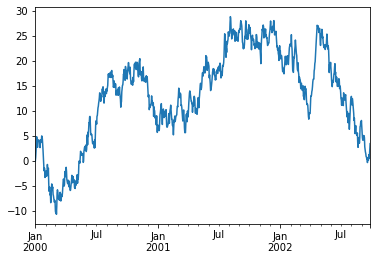

In [110]:
ts = ts.cumsum()
ts.plot()

In [111]:
#데이터프레임에서 plot()메소드는
#라벨이 존재하는 모든 열을 그릴 때 편리하다.
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A','B','C','D'])
df

,A,B,C,D
2000-01-01,0.128007,0.001008,-0.131230,-0.086302
2000-01-02,-0.038483,0.740063,1.581432,0.600369
2000-01-03,0.260490,1.198067,0.779527,0.053567
2000-01-04,-0.012913,0.218204,0.110837,-0.069430
2000-01-05,-0.135137,1.058221,-1.387031,1.024162
...,...,...,...,...
2002-09-22,0.396320,0.865690,0.005217,-0.533083
2002-09-23,-0.531170,-1.364751,0.591799,-0.141014
2002-09-24,-2.295286,1.587562,0.480053,0.704148
2002-09-25,2.059393,-0.249076,0.028466,-1.073949


In [112]:
df.cumsum()

,A,B,C,D
2000-01-01,0.128007,0.001008,-0.131230,-0.086302
2000-01-02,0.089525,0.741072,1.450203,0.514067
2000-01-03,0.350015,1.939139,2.229730,0.567634
2000-01-04,0.337102,2.157342,2.340566,0.498204
2000-01-05,0.201965,3.215563,0.953535,1.522366
...,...,...,...,...
2002-09-22,49.328432,5.507702,-3.974212,8.219986
2002-09-23,48.797262,4.142951,-3.382413,8.078972
2002-09-24,46.501977,5.730514,-2.902360,8.783120
2002-09-25,48.561370,5.481438,-2.873894,7.709170


(<Figure size 432x288 with 0 Axes>,
 <AxesSubplot:>,
 <matplotlib.legend.Legend at 0x1f7aba15640>)

<Figure size 432x288 with 0 Axes>

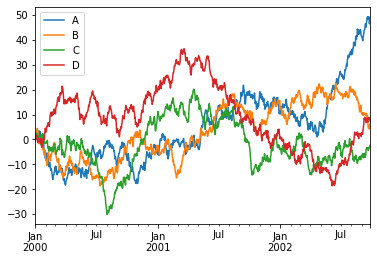

In [113]:
df = df.cumsum()
plt.figure(), df.plot(), plt.legend(loc='best')

#loc=''
#best
#upper right
#upper left
#lower left
#lower right
#right
#center left
#center right
#lower center
#upper center
#center

12. Getting Data In/Out (데이터 입/출력)

In [114]:
#CSV
#csv 파일에 쓴다.
df.to_csv('foo.csv')

In [115]:
#csv 파일을 읽는다.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.128007,0.001008,-0.131230,-0.086302
1,2000-01-02,0.089525,0.741072,1.450203,0.514067
2,2000-01-03,0.350015,1.939139,2.229730,0.567634
3,2000-01-04,0.337102,2.157342,2.340566,0.498204
4,2000-01-05,0.201965,3.215563,0.953535,1.522366
...,...,...,...,...,...
995,2002-09-22,49.328432,5.507702,-3.974212,8.219986
996,2002-09-23,48.797262,4.142951,-3.382413,8.078972
997,2002-09-24,46.501977,5.730514,-2.902360,8.783120
998,2002-09-25,48.561370,5.481438,-2.873894,7.709170


In [116]:
#HDF
#HDFStores에 읽고 쓴다.
#HDF5 Store에 쓴다.
df.to_hdf('foo.h5','df')
#HDF5 Store에서 읽어온다.
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.128007,0.001008,-0.131230,-0.086302
2000-01-02,0.089525,0.741072,1.450203,0.514067
2000-01-03,0.350015,1.939139,2.229730,0.567634
2000-01-04,0.337102,2.157342,2.340566,0.498204
2000-01-05,0.201965,3.215563,0.953535,1.522366
...,...,...,...,...
2002-09-22,49.328432,5.507702,-3.974212,8.219986
2002-09-23,48.797262,4.142951,-3.382413,8.078972
2002-09-24,46.501977,5.730514,-2.902360,8.783120
2002-09-25,48.561370,5.481438,-2.873894,7.709170


In [117]:
#Excel
#MS Excel에 읽고 쓴다.
#엑셀 파일에 쓴다.
df.to_excel('foo.xlsx', sheet_name='Sheet1')
#엑셀 파일을 읽어온다.
pd.read_excel('foo.xlsx','Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.128007,0.001008,-0.131230,-0.086302
1,2000-01-02,0.089525,0.741072,1.450203,0.514067
2,2000-01-03,0.350015,1.939139,2.229730,0.567634
3,2000-01-04,0.337102,2.157342,2.340566,0.498204
4,2000-01-05,0.201965,3.215563,0.953535,1.522366
...,...,...,...,...,...
995,2002-09-22,49.328432,5.507702,-3.974212,8.219986
996,2002-09-23,48.797262,4.142951,-3.382413,8.078972
997,2002-09-24,46.501977,5.730514,-2.902360,8.783120
998,2002-09-25,48.561370,5.481438,-2.873894,7.709170


13. Gotchas (잡았다!)

In [118]:
#연산 수행 시 다음과 같은 예외 상황을 볼 수도 있다.
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [119]:
#이럴 땐 any(), all(), empty 등을 사용해서 뭘 원하는지 선택해야 함.
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


#비교: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html
#Gotchas: https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html